# Lab 5: Harris Corner Detection

***ในแล็บนี้ เราจะศึกษาวิธีการ Implement วิธี Harris Corner Detection ในการค้นหามุมของวัตถุในภาพ*** &nbsp;&nbsp; มุมของวัตถุในภาพมีความสำคัญ คือ มักจะเป็นจุดสังเกต Landmark ที่ดีในการระบุตำแหน่งของวัตถุและส่วนของวัตถุในภาพ โดยสามารถคำนวณด้วยฟังก์ชัน `cornerHarris` ซึ่งมีพารามิเตอร์หลัก ๆ 3 ตัวดังนี้
1. blockSize - ขนาดของ neighbourhood ในการคำนวณหาคะแนน Harris Corner ในตัวอย่างนี้ใช้ค่า 2 
2. ksize - เป็นขนาด Kernel ของ Sobel Operator ที่ใช้ในการคำนวณ Image Derivatives ในตัวอย่างนี้ใช้ค่า 3
3. k - ค่าพารามิเตอร์ในสูตรคำนวณ $$R = det(M) − k(trace(M))^2$$ มักมีค่าระหว่าง [0.04, 0.06]

**Reference**
1. https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html


In [1]:
import cv2
import numpy as np
from skimage import data, color
import matplotlib.pyplot as plt
%matplotlib inline

โหลดภาพตัวอย่าง

In [2]:
gray = data.checkerboard()

คำนวณคะแนน Harris Corner

In [3]:
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

เลือกจุดที่เป็น Corner โดยตั้งค่าขั้นต่ำ Threshold ในตัวอย่างนี้ ใช้ค่า 1% สูงสุด  และใช้ [`Dilate`](https://en.wikipedia.org/wiki/Dilation_(morphology)) เพื่อให้สังเกตจุดมุมได้ง่ายขึ้น

In [4]:
# The result is dilated for marking the corners more visible (only for aesthetics)
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
thresh = 0.01*dst.max()

# Set the corners' color to green
img = color.gray2rgb(gray)
img[dst>thresh]=[0,255,0]

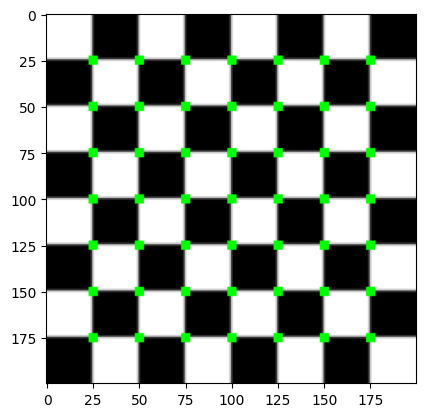

In [5]:
plt.imshow(img)

----